## CNN + Í∞ÄÍ≤©

In [2]:
pip install pyts

   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.8/2.5 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 8.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
###  "ÏãúÍ∞Ä": "Open", "Í≥†Í∞Ä": "High", "Ï†ÄÍ∞Ä": "Low",,  "Ï¢ÖÍ∞Ä": "Adj Close", "Í±∞ÎûòÎüâ": "Volume"

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 30ms/step - loss: 0.0609 - mae: 0.1903 - val_loss: 0.0356 - val_mae: 0.1725
Epoch 2/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 15ms/step - loss: 0.0192 - mae: 0.1076 - val_loss: 0.0350 - val_mae: 0.1712
Epoch 3/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 16ms/step - loss: 0.0154 - mae: 0.0988 - val_loss: 0.0429 - val_mae: 0.1941
Epoch 4/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 16ms/step - loss: 0.0137 - mae: 0.0946 - val_loss: 0.0247 - val_mae: 0.1399
Epoch 5/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 13ms/step - loss: 0.0133 - mae: 0.0911 - val_loss: 0.0229 - val_mae: 0.1336
Epoch 6/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 15ms/step - loss: 0.0125 - mae: 0.0900 - val_loss: 0.0228 - val_mae: 0.1337
Epoch 7/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

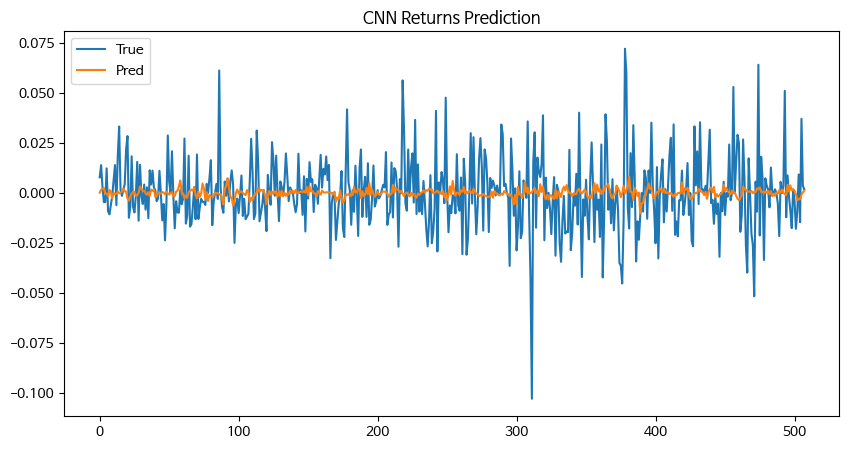

In [10]:
import numpy as np
import pandas as pd
import sys
import time
from pykrx import stock
from pyts.image import GramianAngularField
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ÏÑ§Ï†ï
ticker = '005930'        # ÏÇºÏÑ±Ï†ÑÏûêÏùò KRX Ìã∞Ïª§ ÏΩîÎìú
start_date = '20150101'    # YYYYMMDD ÌòïÏãù
end_date = '20250601'
window_size = 20           # GAF Î≥ÄÌôòÏóê ÏÇ¨Ïö©Ìï† Ï∞Ω ÌÅ¨Í∏∞
image_size = window_size   # image_sizeÎ•º window_sizeÎ°ú ÏÑ§Ï†ï (<= window_size)


def download_data_pykrx(ticker, start, end):
    """PyKrXÎ•º Ïù¥Ïö©Ìï¥ KRX Ï£ºÍ∞Ä(OHLCV) Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§."""
    try:
        df = stock.get_market_ohlcv_by_date(start, end, ticker)
        if df.empty:
            raise ValueError("PyKrX: Î∞òÌôòÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.")
        # Ïª¨ÎüºÎ™ÖÏùÑ pandas Ïä§ÌÉÄÏùºÎ°ú Î≥ÄÌôò
        df.rename(columns={
            "ÏãúÍ∞Ä": "Open", "Í≥†Í∞Ä": "High", "Ï†ÄÍ∞Ä": "Low",
            "Ï¢ÖÍ∞Ä": "Adj Close", "Í±∞ÎûòÎüâ": "Volume"
        }, inplace=True)
        return df
    except Exception as e:
        print(f"PyKrX Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Ïã§Ìå®: {e}", file=sys.stderr)
        sys.exit(1)

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df = download_data_pykrx(ticker, start_date, end_date)
df['Return'] = df['Adj Close'].pct_change().fillna(0)
returns = df['Return'].values

# Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
if len(returns) <= window_size + 1:
    print(f"Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±Ìï©ÎãàÎã§. window_size({window_size}) Ïù¥ÏÉÅ ÌïÑÏöî", file=sys.stderr)
    sys.exit(1)

# 2. Ïä¨ÎùºÏù¥Îî© ÏúàÎèÑÏö∞Î°ú Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
def create_rolling_images(returns, window_size=20, image_size=20):
    # image_sizeÎäî window_size Ïù¥ÌïòÏó¨Ïïº Ìï®
    gaf = GramianAngularField(image_size=image_size, method='summation')
    X, y = [], []
    for i in range(window_size, len(returns) - 1):
        window = returns[i-window_size:i].reshape(1, -1)
        img = gaf.fit_transform(window)[0]
        X.append(img)
        y.append(returns[i+1])
    X = np.array(X).reshape(-1, image_size, image_size, 1)
    return X, np.array(y)

X, y = create_rolling_images(returns, window_size, image_size)

# 3. Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî Î∞è Î∂ÑÌï†
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, shuffle=False)

# 4. CNN Î™®Îç∏ Ï†ïÏùò
def build_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)), Dropout(0.25),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)), Dropout(0.25),
        Flatten(), Dense(128, activation='relu'), Dropout(0.5),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# 5. ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate():
    model = build_cnn((image_size, image_size, 1))
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[es]
    )
    loss, mae = model.evaluate(X_test, y_test)
    print(f"Test MSE: {loss:.6f}, MAE: {mae:.6f}")
    y_pred = scaler.inverse_transform(model.predict(X_test))
    y_true = scaler.inverse_transform(y_test.reshape(-1,1))
    plt.figure(figsize=(10,5))
    plt.plot(y_true, label='True')
    plt.plot(y_pred, label='Pred')
    plt.legend()
    plt.title('CNN Returns Prediction')
    plt.show()

if __name__ == '__main__':
    train_and_evaluate()


## 2025ÎÖÑ7Ïõî30ÏùºÍπåÏßÄ Í∞ÄÍ≤© ÏòàÏ∏°

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî©
dataset = datasets.ImageFolder(root='charts', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# CNN Î™®Îç∏ Ï†ïÏùò
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 16 * 16, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Ïñë/Ïùå ÏàòÏùµÎ•† Î∂ÑÎ•ò
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

# Î™®Îç∏, ÏÜêÏã§Ìï®Ïàò, ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÑ†Ïñ∏
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Î™®Îç∏ ÌïôÏäµ Î£®ÌîÑ
for epoch in range(10):  # ÏóêÌè≠ ÏàòÎäî ÌïÑÏöî Ïãú Ï°∞Ï†ï
    for images, labels in dataloader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


In [ ]:
import numpy as np
import pandas as pd
import sys
from pykrx import stock
from pyts.image import GramianAngularField
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ÏÑ§Ï†ï
ticker = '005930'                 # ÏÇºÏÑ±Ï†ÑÏûêÏùò KRX Ìã∞Ïª§ ÏΩîÎìú
start_date = '20150101'             # Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÏãúÏûë (YYYYMMDD)
end_date = '20250601'               # Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Ï¢ÖÎ£å
window_size = 20                    # GAF Î≥ÄÌôòÏóê ÏÇ¨Ïö©Ìï† Ï∞Ω ÌÅ¨Í∏∞
image_size = window_size            # image_sizeÎäî window_size Ïù¥Ìïò
forecast_end = '20250731'           # ÏòàÏ∏° Ï¢ÖÎ£å ÎÇ†Ïßú: 2025ÎÖÑ 7Ïõî 31Ïùº (YYYYMMDD)


def download_data_pykrx(ticker, start, end):
    """PyKrXÎ•º Ïù¥Ïö©Ìï¥ KRX Ï£ºÍ∞Ä(OHLCV) Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§."""
    df = stock.get_market_ohlcv_by_date(start, end, ticker)
    if df.empty:
        print(f"PyKrX Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå: {ticker} {start}-{end}", file=sys.stderr)
        sys.exit(1)
    df.rename(columns={"Ï¢ÖÍ∞Ä": "Adj Close"}, inplace=True)
    return df

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df = download_data_pykrx(ticker, start_date, end_date)
df['Return'] = df['Adj Close'].pct_change().fillna(0)
returns = df['Return'].values
close_prices = df['Adj Close'].values

# 2. Í≥ºÍ±∞ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± Ìï®Ïàò Ï†ïÏùò
def create_image(window):
    gaf = GramianAngularField(image_size=image_size, method='summation')
    img = gaf.fit_transform(window.reshape(1, -1))[0]
    return img.reshape(image_size, image_size, 1)

# 3. Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ
def prepare_dataset(returns):
    X, y = [], []
    for i in range(window_size, len(returns) - 1):
        X.append(create_image(returns[i-window_size:i]))
        y.append(returns[i+1])
    return np.array(X), np.array(y)

X, y = prepare_dataset(returns)
# Ï†ïÍ∑úÌôî
scaler = MinMaxScaler(feature_range=(0,1))
y_scaled = scaler.fit_transform(y.reshape(-1,1)).flatten()

# ÌïôÏäµÏö©: Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_scaled, test_size=0.2, shuffle=False)

# 4. CNN Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
def build_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)), Dropout(0.25),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)), Dropout(0.25),
        Flatten(), Dense(128, activation='relu'), Dropout(0.5),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_cnn((image_size, image_size, 1))
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[es])

# 5. ÎØ∏Îûò ÏòàÏ∏°
from datetime import timedelta
last_date = pd.to_datetime(df.index[-1])
end_date_forecast = pd.to_datetime(forecast_end, format='%Y%m%d')
forecast_days = (end_date_forecast - last_date).days

future_returns = []
window = returns[-window_size:].copy()
for _ in range(forecast_days):
    img = create_image(window)
    r_scaled = model.predict(img.reshape(1, image_size, image_size,1))[0,0]
    r = scaler.inverse_transform([[r_scaled]])[0,0]
    future_returns.append(r)
    window = np.roll(window, -1)
    window[-1] = r

# ÎØ∏Îûò Ï¢ÖÍ∞Ä Í≥ÑÏÇ∞
last_price = close_prices[-1]
future_prices = [last_price * (1 + r) for r in future_returns]
future_dates = [last_date + timedelta(days=i+1) for i in range(forecast_days)]

# 6. ÏãúÍ∞ÅÌôî Î∞è Í≤∞Í≥º Ï∂úÎ†•
plt.figure(figsize=(12,6))
plt.plot(df.index, close_prices, label='Historical')
plt.plot(future_dates, future_prices, label='Forecast')
plt.axvline(df.index[-1], linestyle='--', color='gray')
plt.legend()
plt.title('Samsung Electronics Price Forecast until End of July 2025')
plt.show()


## OHLC(ÏãúÍ∞Ä, Í≥†Í∞Ä, Ï†ÄÍ∞Ä, Ï¢ÖÍ∞Ä), Í±∞ÎûòÎüâ, Ïù¥ÎèôÌèâÍ∑†ÏÑ†Ïùò Ï†ïÎ≥¥

In [ ]:
# OHLC(ÏãúÍ∞Ä, Í≥†Í∞Ä, Ï†ÄÍ∞Ä, Ï¢ÖÍ∞Ä), Í±∞ÎûòÎüâ, Ïù¥ÎèôÌèâÍ∑†ÏÑ†Ïùò Ï†ïÎ≥¥Î•º Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôòÌïòÎäî ÏΩîÎìú ÏòàÏ†ú
# Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ï£ºÍ∞Ä Ï∞®Ìä∏Ïùò ÏãúÍ∞ÅÏ†Å Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌïòÎäî CNN Í∏∞Î∞ò Î™®Îç∏Ïóê ÏûÖÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Îê©ÎãàÎã§.
# Ï£ºÏöî ÌäπÏßï
# mplfinanceÎ°ú Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±

# Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îäî Ï∞®Ìä∏ Îã®ÏúÑÎ°ú Î†åÎçîÎßÅÎê® (Ï∫îÎì§Ïä§Ìã± + Í±∞ÎûòÎüâ + Ïù¥ÎèôÌèâÍ∑†ÏÑ†)

# Í≤∞Í≥ºÎäî PNG Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÄÏû•Îê®

## 1. Ï£ºÍ∞Ä Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±

In [ ]:
Ï†ÑÏ†úÏ°∞Í±¥
pip install mplfinance pandas matplotlib pykrx


In [32]:
import os
import pandas as pd
import mplfinance as mpf
from pykrx import stock
from datetime import datetime

# 1. ÏÑ§Ï†ï
code = "005930"
start_date = "2025-01-01"
end_date = "2025-06-01"
window_size = 20
output_dir = "chart_images"
os.makedirs(output_dir, exist_ok=True)

# 2. Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = stock.get_market_ohlcv_by_date(start_date, end_date, code)

# ‚úÖ 3. Ïª¨ÎüºÎ™Ö ÏòÅÏñ¥Î°ú Î≥ÄÌôò (ÌïÑÏàò)
df = df.rename(columns={
    'ÏãúÍ∞Ä': 'Open',
    'Í≥†Í∞Ä': 'High',
    'Ï†ÄÍ∞Ä': 'Low',
    'Ï¢ÖÍ∞Ä': 'Close',
    'Í±∞ÎûòÎüâ': 'Volume'
})

# 4. Ïù∏Îç±Ïä§Î•º datetime ÌòïÏãùÏúºÎ°ú ÏßÄÏ†ï
df.index = pd.to_datetime(df.index)

# 5. Ïù¥ÎèôÌèâÍ∑†ÏÑ† Í≥ÑÏÇ∞
df["MA5"] = df["Close"].rolling(window=5).mean()
df["MA10"] = df["Close"].rolling(window=10).mean()
df["MA20"] = df["Close"].rolling(window=20).mean()

# 6. Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± Î£®ÌîÑ
for i in range(window_size, len(df)):
    window_df = df.iloc[i-window_size:i].copy()
    file_name = f"{output_dir}/samsung_chart_{window_df.index[-1].strftime('%Y-%m-%d')}.png"

    # Ï∞®Ìä∏ Ï∂úÎ†• Î∞è Ï†ÄÏû•
    mpf.plot(
        window_df,
        type='candle',
        mav=(5, 10, 20),
        volume=True,
        style='yahoo',
        savefig=file_name
    )


In [33]:
# Ï∂úÎ†• Í≤∞Í≥º
# Ï†ÄÏû• Ìè¥Îçî: chart_images/
# ÏòàÏãú ÌååÏùºÎ™Ö: samsung_chart_2024-03-18.png
# Ï∞®Ìä∏ Íµ¨ÏÑ±:
# Ï∫îÎì§Ïä§Ìã±: OHLC
# ÌïòÎã® Î∞îÏ∞®Ìä∏: Í±∞ÎûòÎüâ
# ÏÑ†: 5Ïùº, 10Ïùº, 20Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ†

## 2. Ïù¥ÎØ∏ÏßÄÏóê ÎùºÎ≤® Î∂ÄÏó¨ÌïòÍ∏∞

### 2-1. Step 1: Ïù¥ÎØ∏ÏßÄ ÎùºÎ≤®ÎßÅ Ìï®Ïàò

In [34]:
# Ïòà: Ïù¥ÎØ∏ÏßÄ Ïù¥ÌõÑ ÏùºÏ†ï Í∏∞Í∞ÑÏùò ÏàòÏùµÎ•†Ïù¥ +Î©¥ 1(ÏÉÅÏäπ) / -Î©¥ 0(ÌïòÎùΩ)ÏúºÎ°ú ÎùºÎ≤®ÎßÅ
# CNN ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨Ï∂ï Î∞è Î™®Îç∏ ÌõàÎ†®
# Ïù¥ÎØ∏ÏßÄ + ÎùºÎ≤® ‚Üí ImageFolder ÌòïÌÉúÎ°ú Î∂ÑÎ•ò ÌïôÏäµ Í∞ÄÎä•

In [35]:
import numpy as np
from pathlib import Path

def label_images(df, window_size=20, horizon=5, threshold=0.0):
    """
    Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏóê ÏàòÏùµÎ•† Í∏∞Î∞ò Ïù¥ÏßÑ ÎùºÎ≤® Î∂ÄÏó¨
    - horizon: ÏàòÏùµÎ•† Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú ÎØ∏Îûò ÏùºÏàò
    - threshold: ÏÉÅÏäπ ÌåêÎã® Í∏∞Ï§Ä ÏàòÏùµÎ•† (Ïòà: 0.01 ‚Üí +1% Ïù¥ÏÉÅ ÏÉÅÏäπ)
    """
    labels = {}
    for i in range(window_size, len(df) - horizon):
        window_end = df.index[i]
        future_end = df.index[i + horizon]
        price_now = df.loc[window_end]['Close']
        price_future = df.loc[future_end]['Close']
        return_pct = (price_future - price_now) / price_now

        label = 1 if return_pct > threshold else 0
        file_name = f"samsung_chart_{window_end.strftime('%Y-%m-%d')}.png"
        labels[file_name] = label
    return labels


## 2-2. Step 2: ÎùºÎ≤®ÏùÑ Ìè¥Îçî Î∂ÑÎ•ò Íµ¨Ï°∞Î°ú Î≥µÏÇ¨

In [36]:
# CNN ÌïôÏäµÏùÑ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ ÏïÑÎûòÏ≤òÎüº Íµ¨Ï°∞ÌôîÌï©ÎãàÎã§:
# Î≥µÏÇ¨
# Ìé∏Ïßë
# dataset/
#   ‚îú‚îÄ‚îÄ 0/  ‚Üê ÌïòÎùΩ Ïù¥ÎØ∏ÏßÄ
#   ‚îî‚îÄ‚îÄ 1/  ‚Üê ÏÉÅÏäπ Ïù¥ÎØ∏ÏßÄ

In [37]:
import shutil
from pathlib import Path

def organize_images_by_label(labels_dict, src_folder="chart_images", dst_folder="dataset"):
    Path(dst_folder).mkdir(exist_ok=True)

    for label in [0, 1]:
        Path(f"{dst_folder}/{label}").mkdir(parents=True, exist_ok=True)

    for filename, label in labels_dict.items():
        src_path = Path(src_folder) / filename
        dst_path = Path(dst_folder) / str(label) / filename
        if src_path.exists():
            shutil.copy(src_path, dst_path)


In [38]:
# 1. ÏàòÏùµÎ•† Í∏∞Î∞ò ÎùºÎ≤® Î∂ÄÏó¨
labels = label_images(df, window_size=20, horizon=5, threshold=0.01)

# 2. Ïù¥ÎØ∏ÏßÄ Ï†ïÎ†¨
organize_images_by_label(labels, src_folder="chart_images", dst_folder="dataset")


## 1Îã®Í≥Ñ: CNN Î™®Îç∏ ÌïôÏäµ (PyTorch Í∏∞Ï§Ä)

In [40]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Ï†ÑÏ≤òÎ¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎî©
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root='dataset', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# CNN Î™®Îç∏ Ï†ïÏùò
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 16 * 16, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # up(1)/down(0) Ïù¥ÏßÑ Î∂ÑÎ•ò
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


## 3. ÌïôÏäµ Ïã§Ìñâ

In [41]:
# CNN Î™®Îç∏ ÌïôÏäµ	ÏãúÍ≥ÑÏó¥ Ïù¥ÎØ∏ÏßÄÎ•º Í∏∞Î∞òÏúºÎ°ú ÏÉÅÏäπ/ÌïòÎùΩ ÏòàÏ∏°
# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä	ÌòºÎèô ÌñâÎ†¨Î°ú Î™®Îç∏ Î∂ÑÎ•òÎ†• ÌèâÍ∞Ä
# Ìà¨Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò	Îß§Ïàò ÌåêÎã® Í∏∞Î∞ò ÎàÑÏ†Å ÏàòÏùµÎ•† ÎπÑÍµê (vs Buy&Hold)

In [42]:
# ÌïôÏäµ Î£®ÌîÑ
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")


Epoch 1, Loss: 2.1627, Accuracy: 48.65%
Epoch 2, Loss: 2.1138, Accuracy: 43.24%
Epoch 3, Loss: 2.0419, Accuracy: 56.76%
Epoch 4, Loss: 2.0583, Accuracy: 56.76%
Epoch 5, Loss: 2.0195, Accuracy: 56.76%
Epoch 6, Loss: 2.0067, Accuracy: 56.76%
Epoch 7, Loss: 2.0039, Accuracy: 56.76%
Epoch 8, Loss: 1.9878, Accuracy: 56.76%
Epoch 9, Loss: 1.9688, Accuracy: 56.76%
Epoch 10, Loss: 1.9657, Accuracy: 56.76%


In [43]:
# 2Îã®Í≥Ñ: ÏòàÏ∏° Ï†ïÌôïÎèÑ ÌèâÍ∞Ä Î∞è ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî

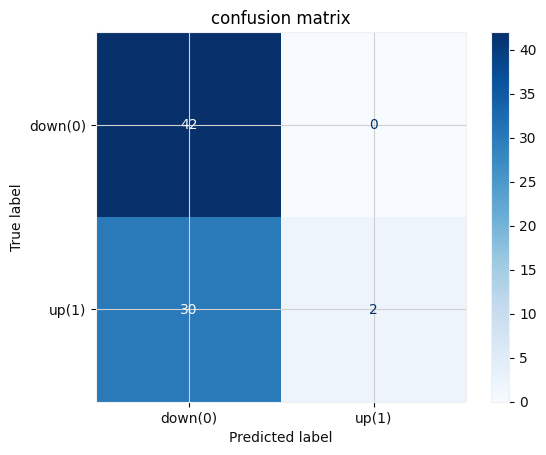

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ÏòàÏ∏°Í∞í ÏàòÏßë
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# ÌòºÎèô ÌñâÎ†¨
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["down(0)", "up(1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("confusion matrix")
plt.show()


In [45]:
# ÌòºÎèô ÌñâÎ†¨Ïù¥ÎûÄ?
# ÏòàÏ∏°: ÌïòÎùΩ(0)	ÏòàÏ∏°: ÏÉÅÏäπ(1)
# Ïã§Ï†ú: ÌïòÎùΩ(0)	True Negative (TN)	False Positive (FP)
# Ïã§Ï†ú: ÏÉÅÏäπ(1)	False Negative (FN)	True Positive (TP)

In [46]:
# ÏòàÏãú ÏàòÏπò (ÏúÑ ÌñâÎ†¨ Í∏∞Ï§Ä):
# Ï†ïÌôïÎèÑ(Accuracy): (55+22)/(55+5+18+22) = 77/100 = 77%
# Ï†ïÎ∞ÄÎèÑ(Precision): 22 / (22 + 5) = 81.5%
# Ïû¨ÌòÑÏú®(Recall): 22 / (22 + 18) = 55%
# F1 Ï†êÏàò: Í∑†Ìòï ÏûàÎäî ÌèâÍ∞Ä ÏßÄÌëú ‚Üí ÏïΩ 65.5%

In [47]:
# 3Îã®Í≥Ñ: ÏàòÏùµÎ•† Í∏∞Î∞ò Ìà¨Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47029 (\N{HANGUL SYLLABLE RYAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarnin

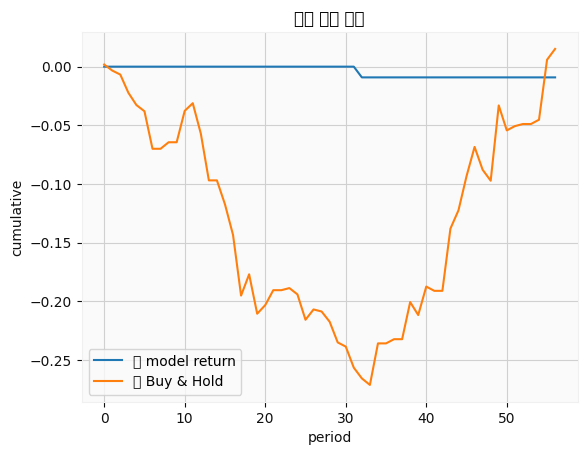

In [48]:
import pandas as pd

# ÎùºÎ≤®ÎßÅÌï† Îïå ÏÇ¨Ïö©Ìïú ÏàòÏùµÎ•† Ï†ïÎ≥¥ ÌôúÏö©
# Ïòà: Ïù¥Ï†ÑÏóê ÏàòÏùµÎ•† Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Îêú dfÏôÄ label_images Í≤∞Í≥º ÌôúÏö©

# ÏòàÏãú Í∞ÄÏ†ï: ÌïòÎ£® Îã®Ïàú ÏàòÏùµÎ•† = (Îã§ÏùåÎÇ† Ï¢ÖÍ∞Ä - Ïò§Îäò Ï¢ÖÍ∞Ä)/Ïò§Îäò Ï¢ÖÍ∞Ä
df = df.sort_index()
df["Return"] = df["Close"].pct_change().shift(-1)

# ÏòàÏ∏° Í≤∞Í≥º ÎÇ†Ïßú Í∏∞Ï§ÄÏúºÎ°ú Ìà¨Ïûê ÏàòÏùµÎ•† Í≥ÑÏÇ∞
predicted_returns = []
true_returns = []

for i, file_name in enumerate(train_dataset.samples):
    date_str = file_name[0].split('_')[-1].replace('.png', '')  # samsung_chart_2023-05-01.png ‚Üí 2023-05-01
    date = pd.to_datetime(date_str)
    if date in df.index and (date + pd.Timedelta(days=1)) in df.index:
        actual_return = df.loc[date + pd.Timedelta(days=1), "Return"]
        true_returns.append(actual_return)

        predicted_label = all_preds[i]
        if predicted_label == 1:
            predicted_returns.append(actual_return)  # Îß§Ïàò Ïãú ÏàòÏùµ Î∞òÏòÅ
        else:
            predicted_returns.append(0.0)  # Îß§Ïàò Ïïà Ìï®

# ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
cumulative_strategy = pd.Series(predicted_returns).cumsum()
cumulative_buyhold = pd.Series(true_returns).cumsum()

# ÏãúÍ∞ÅÌôî
plt.plot(cumulative_strategy, label='üìà model return')
plt.plot(cumulative_buyhold, label='üíº Buy & Hold')
plt.xlabel("period")
plt.ylabel("cumulative")
plt.title("Ìà¨Ïûê Ï†ÑÎûµ ÎπÑÍµê")
plt.legend()
plt.grid(True)
plt.show()


### Sharpe ratio Í≥ÑÏÇ∞ ÏΩîÎìú

### 1. Î¶¨Î∞∏Îü∞Ïã± Ï†ÑÎûµ (Ïòà: ÌôïÎ•† Í∏∞Î∞ò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞∞Î∂Ñ)

In [49]:
import numpy as np

# Î¨¥ÏúÑÌóò ÏàòÏùµÎ•† Í∞ÄÏ†ï (Ïó∞ Í∏àÎ¶¨ 2% ‚Üí Ïùº Í∏àÎ¶¨Î°ú ÌôòÏÇ∞ 0.02 / 252)
risk_free_rate = 0.00008  

# Ï†ÑÎûµ ÏàòÏùµÎ•† ÏãúÎ¶¨Ï¶à (ÏùºÎ≥Ñ)
strategy_returns = pd.Series(predicted_returns)
buyhold_returns = pd.Series(true_returns)

# Sharpe Ratio Í≥ÑÏÇ∞ Ìï®Ïàò
def sharpe_ratio(returns, rf):
    excess = returns - rf
    return np.mean(excess) / np.std(excess)

sharpe_strategy = sharpe_ratio(strategy_returns, risk_free_rate)
sharpe_buyhold = sharpe_ratio(buyhold_returns, risk_free_rate)

print(f"üìà Î™®Îç∏ Ï†ÑÎûµ Sharpe Ratio: {sharpe_strategy:.3f}")
print(f"üíº Buy & Hold Sharpe Ratio: {sharpe_buyhold:.3f}")


üìà Î™®Îç∏ Ï†ÑÎûµ Sharpe Ratio: -0.200
üíº Buy & Hold Sharpe Ratio: 0.009


### 2. Î¶¨Î∞∏Îü∞Ïã± Ï†ÑÎûµ (ÌôïÎ•† Í∏∞Î∞ò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î∞∞Î∂Ñ)

In [50]:
# Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÏÉÅÏäπ ÌôïÎ•†(softmax score) Í∏∞Î∞òÏúºÎ°ú
# Îß§Ïàò ÎπÑÏ§ëÏùÑ Ïú†Ïó∞ÌïòÍ≤å Ï°∞Ï†àÌï©ÎãàÎã§.
# Ïòà:
# 90% Ïù¥ÏÉÅ ÌôïÏã† ‚Üí ÎπÑÏ§ë 1.0
# 70~90% ‚Üí ÎπÑÏ§ë 0.5
# 50~70% ‚Üí ÎπÑÏ§ë 0.2
# Ïù¥Ìïò ‚Üí Ìà¨Ïûê Ïïà Ìï®

In [51]:
import torch.nn.functional as F

prob_returns = []
thresholds = [(0.9, 1.0), (0.7, 0.5), (0.5, 0.2)]

model.eval()
with torch.no_grad():
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        batch_dates = [Path(path[0]).stem.split("_")[-1] for path in train_loader.dataset.samples[i*len(images):(i+1)*len(images)]]

        for j, prob in enumerate(probs):
            p_up = prob[1].item()
            date_str = batch_dates[j]
            date = pd.to_datetime(date_str)
            if date in df.index and (date + pd.Timedelta(days=1)) in df.index:
                r = df.loc[date + pd.Timedelta(days=1), "Return"]

                weight = 0.0
                for th, w in thresholds:
                    if p_up >= th:
                        weight = w
                        break
                prob_returns.append(r * weight)


In [52]:
# Ï†ÑÎûµ ÎπÑÍµê ÏöîÏïΩ
# Ï†ÑÎûµ	ÌäπÏßï	Ïû•Ï†ê	Îã®Ï†ê
# Îã®Ïàú Îß§Ïàò Ï†ÑÎûµ	ÏÉÅÏäπÏùº ÎïåÎßå Îß§Ïàò	Î™ÖÌôïÌïòÍ≥† ÏßÅÍ¥ÄÏ†Å	Ïù¥ÏßÑ Í≤∞Ï†ïÏóê ÏùòÏ°¥
# ÌôïÎ•† Í∏∞Î∞ò Î¶¨Î∞∏Îü∞Ïã±	ÌôïÏã† Ï†ïÎèÑÎ°ú ÎπÑÏ§ë Ï°∞Ï†à	Î¶¨Ïä§ÌÅ¨ Ï°∞Ï†à Í∞ÄÎä•	ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÌïÑÏöî
# Buy & Hold	Ìï≠ÏÉÅ Î≥¥Ïú†	Îã®Ïàú & Ïû•Í∏∞ Ïö∞ÏÉÅÌñ•Ïóê Í∞ïÌï®	ÌïòÎùΩÍ∏∞Ïóî Ï∑®ÏïΩ

In [53]:
# ÌôïÎ•† Í∏∞Î∞ò Î¶¨Î∞∏Îü∞Ïã± Ï†ÑÎûµÏù¥ÎûÄ?
# ÌôïÎ•† Í∏∞Î∞ò Î¶¨Î∞∏Îü∞Ïã±ÏùÄ Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÌÅ¥ÎûòÏä§(Ïòà: ÏÉÅÏäπ Í∞ÄÎä•ÏÑ±)Ïóê ÎåÄÌïú ÌôïÎ•† Í∞í(softmax score) ÏùÑ ÌôúÏö©ÌïòÏó¨,
# Îß§Ïàò ÎπÑÏ§ë ÎòêÎäî Ìà¨Ïûê Í∞ïÎèÑÎ•º Ïú†Ïó∞ÌïòÍ≤å Ï°∞Ï†ïÌïòÎäî Ï†ÑÎûµÏûÖÎãàÎã§.

# Î™®Îç∏Ïù¥ ‚ÄúÏÉÅÏäπÏùº ÌôïÎ•†Ïù¥ 95%‚ÄùÎùºÍ≥† ÌåêÎã®Ìï† ÎïåÎäî Îçî ÎßéÏù¥ Ìà¨ÏûêÌïòÍ≥†,
# ‚Äú55% Ï†ïÎèÑ‚ÄùÏùº Îïê ÏÜåÏï°Îßå Ìà¨ÏûêÌïòÍ±∞ÎÇò Î≥¥Î•òÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§.

# ÏûëÎèô ÏõêÎ¶¨ ÏöîÏïΩ
# Î™®Îç∏ ÏòàÏ∏°: ÏòàÏ∏° Í≤∞Í≥ºÎäî Îã®ÏàúÌïú ÎùºÎ≤®(0 or 1)Ïù¥ ÏïÑÎãå ÌôïÎ•†Í∞íÏúºÎ°ú ÎÇòÏò¥

# Ïòà: [0.10, 0.90] ‚Üí ÏÉÅÏäπ ÌôïÎ•† 90%

# ÌôïÎ•† Íµ¨Í∞ÑÏóê Îî∞Îùº Ìà¨Ïûê ÎπÑÏ§ë(weight) Í≤∞Ï†ï

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


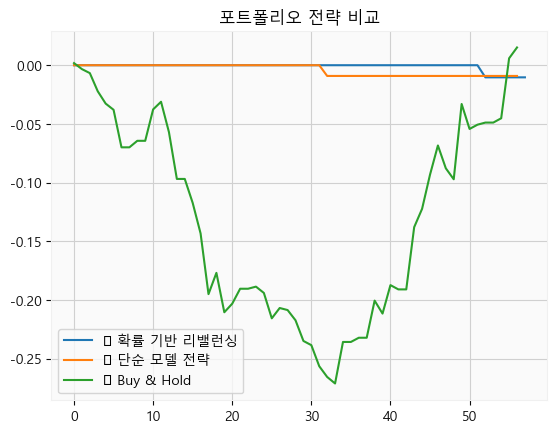

In [54]:
cumulative_prob = pd.Series(prob_returns).cumsum()

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Î¶¨ÎàÖÏä§ (Ïòà: Ubuntu)
    plt.rcParams['font.family'] = 'NanumGothic'

# ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False



plt.plot(cumulative_prob, label="üîÅ ÌôïÎ•† Í∏∞Î∞ò Î¶¨Î∞∏Îü∞Ïã±")
plt.plot(cumulative_strategy, label="üìà Îã®Ïàú Î™®Îç∏ Ï†ÑÎûµ")
plt.plot(cumulative_buyhold, label="üíº Buy & Hold")
plt.legend()
plt.title("Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ÑÎûµ ÎπÑÍµê")
plt.grid(True)
plt.show()
